## Portfolio assignment 19
30 min: Create a cluster model on the penguins dataset.
- Use the pairplot() function on the penguins dataset. Do you visually notice any clusters? How many clusters do you think there are?
- Use the KMeans algorithm to create a cluster model. Apply this model to the dataset to create an extra column 'cluster' just like we did for the iris dataset above.  
<b>Note</b>: Some machine learning algorithms can not handle missing values. You will either need to 
 - replace missing values (with the mean or most popular value). For replacing missing values you can use .fillna(\<value\>) https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html
 - remove rows with missing data.  You can remove rows with missing data with .dropna() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
- Calculate the Silhouette Coefficient for your clustering. Play around with the features and n_clusters to search for better results. Keep the cluster model with the highest Silhouette Coefficient.
- Use the pairplot(hue='cluster') function to observe how the model has clustered the data.
- We know the species of each penguin. Use a contingency table to reveal the relation between the cluster results and the species. Is there an exact match? Are there species which ended up in the same cluster? If so, what does it mean that they ended up in the same cluster?

In [124]:
import pandas as pd
import seaborn as sns

In [125]:
penguins = sns.load_dataset("penguins").dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


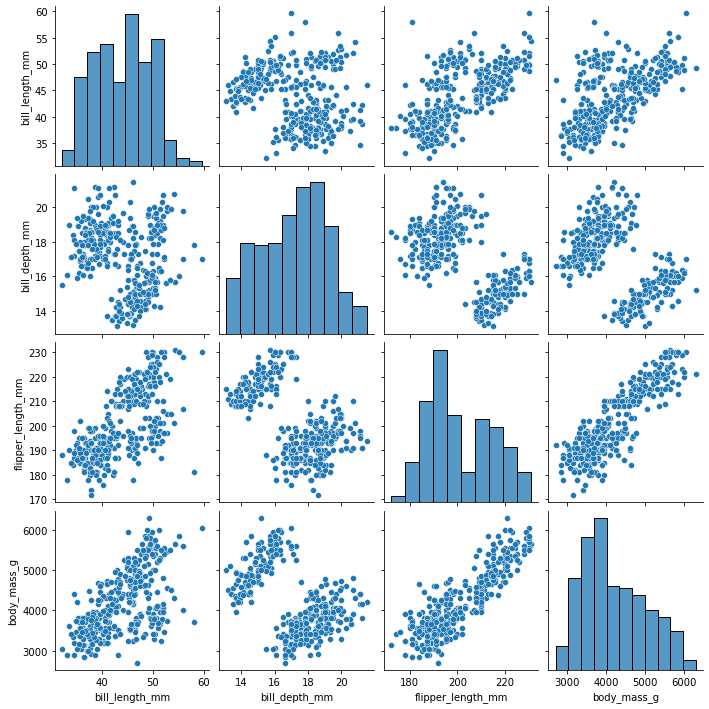

In [126]:
sns.pairplot(penguins)

Visueel zie ik in sommige pairplots (vooral de eerste kolom) 3 groepen en hoe meer je naar rechtsonder gaat, 2 groepen en vervolgens 1 lijn. Laten we eerst kijken naar 3 clusters.

In [127]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [128]:
features = ['bill_length_mm','bill_depth_mm','flipper_length_mm', 'body_mass_g']
km = KMeans(n_clusters=3, random_state=42).fit(penguins[features])

In [129]:
penguins['cluster'] = km.predict(penguins[features])

We voegen een kolom 'cluster' toe aan de penguins dataset.

In [130]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,2
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,2
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,2
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,2


In [131]:
penguins.cluster.value_counts()

2    150
0    109
1     74
Name: cluster, dtype: int64

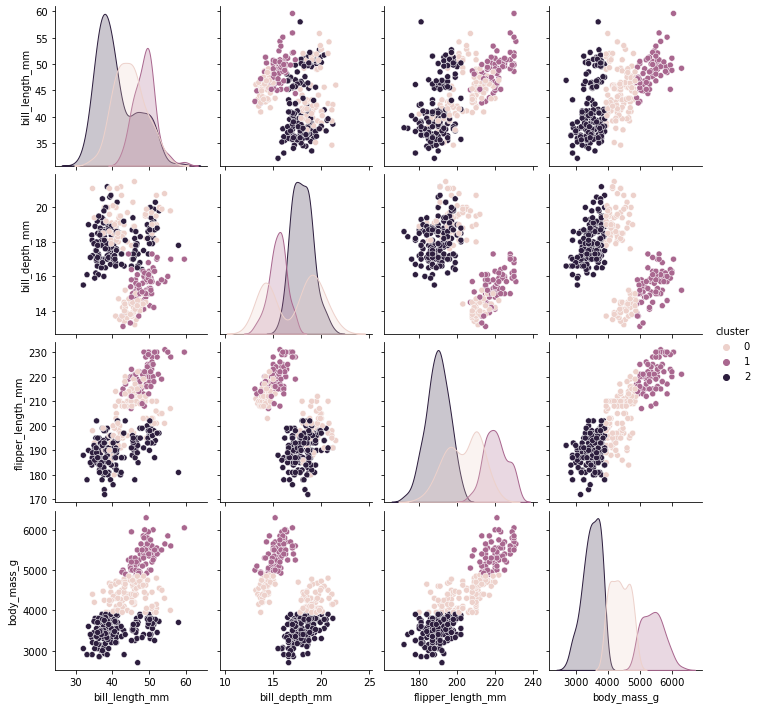

In [132]:
sns.pairplot(penguins, hue="cluster")

We zien hier dat beige en zwart ielkaar best overlappen.. Ik ga er dan toch vanuit dat er 2 clusters zijn.

In [145]:
features = ['bill_length_mm','bill_depth_mm','flipper_length_mm', 'body_mass_g']
km = KMeans(n_clusters=2, random_state=42).fit(penguins[features])

In [146]:
penguins['cluster'] = km.predict(penguins[features])

In [147]:
penguins.cluster.value_counts()

0    203
1    130
Name: cluster, dtype: int64

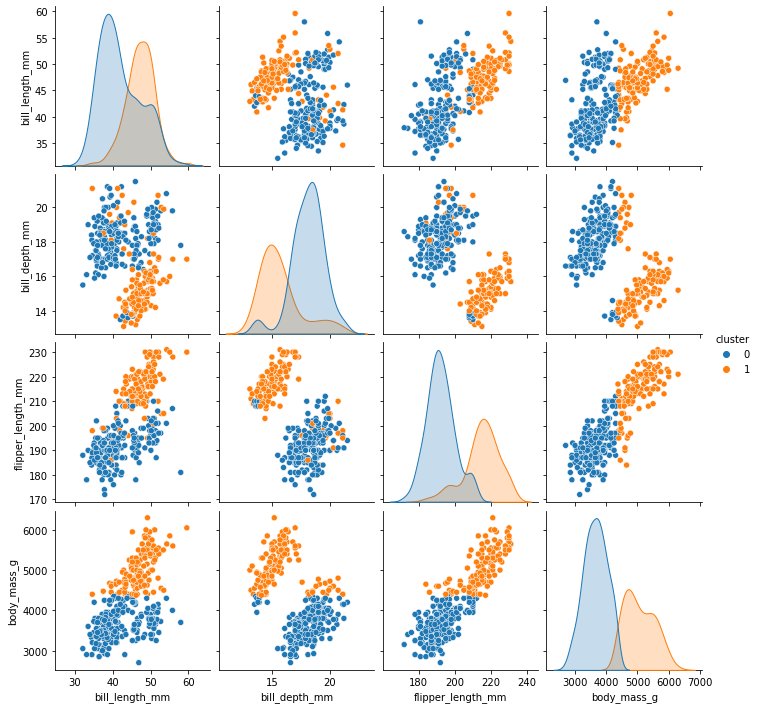

In [136]:
sns.pairplot(penguins, hue="cluster")

Dit ziet er wat netter uit. Je ziet bij sommige plots echt duidelijk een witte lijn tussen de twee clusters.

## Evaluatie

In [137]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [138]:
# You can change the features and n_clusters in the k-means above and check the impact on the Silhouette Coefficient
metrics.silhouette_score(penguins[features], km.labels_, metric='euclidean')

0.6307117469850305

Ik denk dat de silhouette coëfficiënt hoger kan zijn.. laten we alleen de flipper length en bill depth behouden.

In [139]:
features = ['flipper_length_mm', 'bill_depth_mm']
km = KMeans(n_clusters=2, random_state=42).fit(penguins[features])

In [140]:
# You can change the features and n_clusters in the k-means above and check the impact on the Silhouette Coefficient
metrics.silhouette_score(penguins[features], km.labels_, metric='euclidean')

0.6788625305669964

Twee clusters en alleen de flipper_length_mm en bill_depth_mm als features, geeft de hoogste silhouette score.

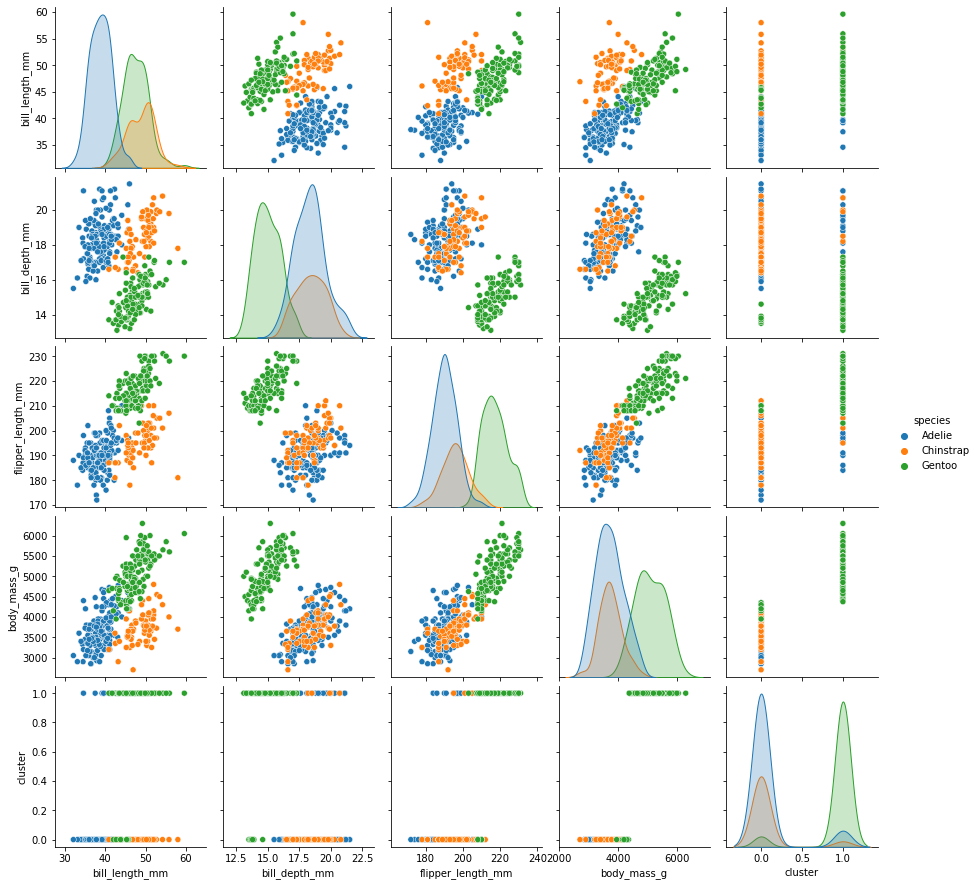

In [141]:
sns.pairplot(penguins, hue="species")

In [142]:
contingency_table = penguins.groupby(['species','cluster']).size().unstack('cluster', fill_value=0)
contingency_table

cluster,0,1
species,,
Adelie,132,14
Chinstrap,63,5
Gentoo,8,111


Er is geen exacte match dat de ene species geheel in een cluster zit. We kunnen hieruit wél lezen dat de meeste Adelie en Chinstrap penguïns samen in cluster 0 zitten en Gentoo penguïns in cluster 1! Dit betekent dat de Adelie en Chinstrap penguïns ongeveer dezelfde scoren voor alle features. Ze zien dus qua uiterlijk (o.b.v. de features) er hetzelfde uit. Hier zit wel degelijk verschil in. Als we namelijk naar geslacht kijken (ongeveer 50/50), dan zie je dat de geslachten eerlijker verdeeld zijn over de clusters en zie je geen clusters die geheel 1 kleur zijn.

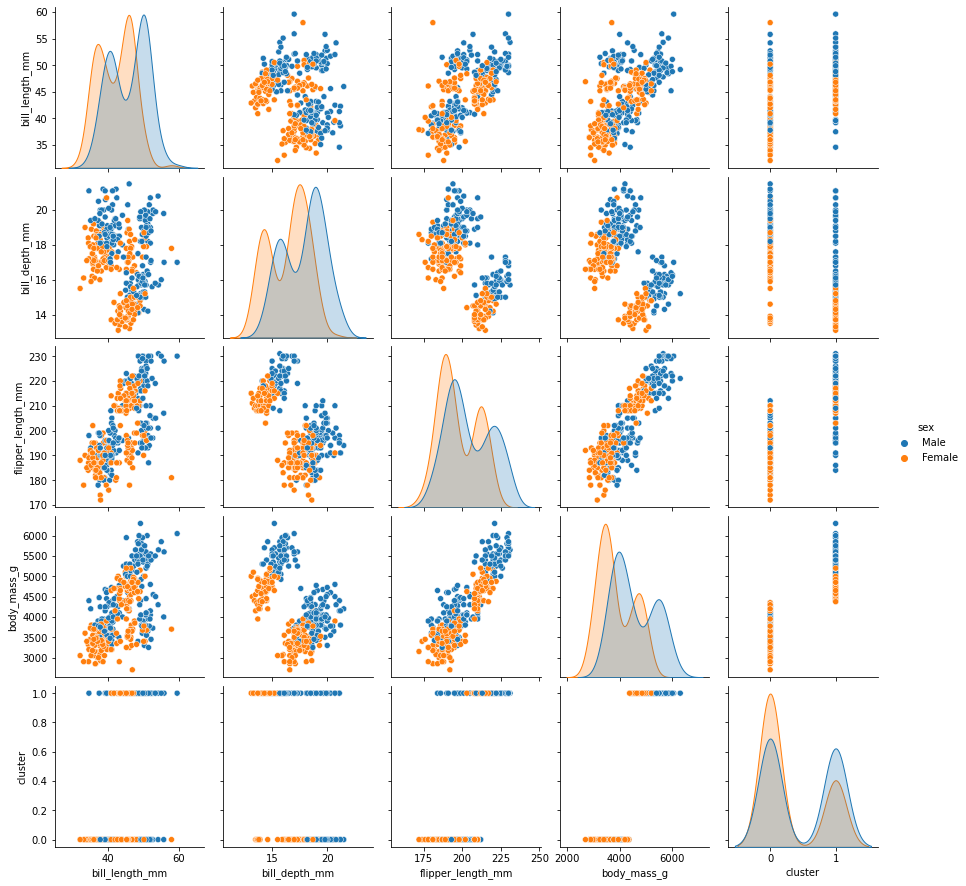

In [143]:
sns.pairplot(penguins, hue="sex")

In [144]:
contingency_table = penguins.groupby(['sex','cluster']).size().unstack('cluster')
contingency_table

cluster,0,1
sex,,
Female,115,50
Male,88,80
